# 1D Chain
In this tutorial, we are going to look at a 1D chain. Consider a particle with Hamiltonian

\begin{equation}
H = -\frac{\hbar^2}{2m}\partial_x^2 + V(x)
\end{equation}

where $V(x)$ is periodic. The solutions are Bloch functions
$$
\psi = u_k(x) e^{ikx}
$$
where $-\infty < k < \infty$.

If we discretize the partial derivative, we get
\begin{eqnarray}
\partial_x \psi(x)&=&\frac{\psi(\Delta(n+1)) - \psi(\Delta n)}{\Delta}\\
&=&\frac{u_k(\Delta(n+1))e^{ik\Delta(n+1)} - u_k(\Delta n)e^{ik\Delta n}}{\Delta}  
\end{eqnarray}

where $\Delta$ is the grid spacing. The second derivative can be written similarly,

$$
\partial_x^2 \psi(x) =\frac{(u_{n + 1}e^{ik\Delta(n+1)} - 2u_ne^{ik\Delta(n)} - u_{n-1}e^{ik\Delta(n-1)})}{\Delta^2}
$$
which gives the TISE as
\begin{eqnarray}
-\frac{\hbar^2 e^{ik\Delta n} }{ 2m\Delta^2 } (u_{n + 1} e^{ik\Delta} - 2 u_n + u_{n-1}e^{-ik\Delta} ) + V(n)u_n e^{ik\Delta n} &=& Eu_n e^{ik\Delta n}\\
-\frac{\hbar^2}{ 2m\Delta^2 } (u_{n + 1} e^{ik\Delta} - 2 u_n + u_{n-1}e^{-ik\Delta} ) + V(n)u_n  &=& Eu_n
\end{eqnarray}
At the boundary, $u_0 = u_{-1}$ and $u_N = u_{N+1}$ where $N$ is the size of the chain excluding the leads. Therefore at the endpoints we get 
$$
-\frac{\hbar^2}{ 2m\Delta^2 } (u_{1} e^{ik\Delta} + (e^{-ik\Delta} - 2)u_0 ) + V(0)u_0  = Eu_0
$$
and 
$$
-\frac{\hbar^2}{ 2m\Delta^2 } (u_{N}( e^{ik\Delta} - 2) + u_{N-1}e^{-ik\Delta} ) + V(N)u_N= Eu_N
$$

In matrix form for $N=4$, let's say we get
$$
\begin{pmatrix}
-t(e^{-ik\Delta} - 2) + V_0 & -t e^{ik\Delta} & 0 & 0 & 0 \\
-t e^{-ik\Delta} & 2t + V_1 & -t e^{ik\Delta} & 0 & 0 \\
0 & -t e^{-ik\Delta} & 2t + V_2 & -t e^{ik\Delta} & 0 \\
0 & 0 & -t e^{-ik\Delta} & 2t + V_3 & -t e^{ik\Delta} \\
0 & 0 & 0 & -t e^{-ik\Delta} & -t(e^{ik\Delta} - 2) + V_4 \\
\end{pmatrix}
\begin{pmatrix}
u_0 \\
u_1\\
u_2\\
u_3\\
u_4
\end{pmatrix}=E
\begin{pmatrix}
u_0 \\
u_1\\
u_2\\
u_3\\
u_4
\end{pmatrix}
$$

In kwant, we usually take $t= \Delta = 1.0$ and $V_i = 0$ such that
$$
\begin{pmatrix}
-e^{-ik} + 2 & - e^{ik} & 0 & 0 & 0 \\
- e^{-ik} & 2 & -e^{ik} & 0 & 0 \\
0 & -e^{-ik\Delta} & 2 & -e^{ik} & 0 \\
0 & 0 & -e^{-ik} & 2 & -e^{ik} \\
0 & 0 & 0 & -e^{-ik} & -e^{ik} + 2\\
\end{pmatrix}
\begin{pmatrix}
u_0 \\
u_1\\
u_2\\
u_3\\
u_4
\end{pmatrix}=E
\begin{pmatrix}
u_0 \\
u_1\\
u_2\\
u_3\\
u_4
\end{pmatrix}
$$



In [20]:
import kwant
from matplotlib import pyplot
from scipy.sparse.linalg import eigs
import numpy as np
%matplotlib inline

def make_system(a=1, t=1.0, L=5):
    # Start with an empty tight-binding system and a single square lattice. 
    # `a` is the lattice constant (by default set to 1 for simplicity.
    lat = kwant.lattice.chain(a)

    syst = kwant.Builder()

    syst[(lat(x) for x in range(L))] = 2 * t

    syst[lat.neighbors()] = -t
    # syst[lat(0), lat(L - 1)] = -t

    lead = kwant.Builder(kwant.TranslationalSymmetry((-a,)))
    lead[lat(0)] = 2 * t
    lead[lat.neighbors()] = -t
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())
    
    return syst

/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:103: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefs = np.linalg.lstsq(vecs_orig.T, vecs.T)[0]
/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  center_coords = np.array(np.round(np.linalg.lstsq(basis.T, vec)[0]), int)


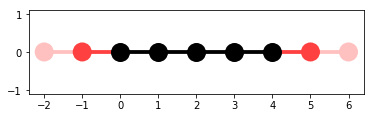

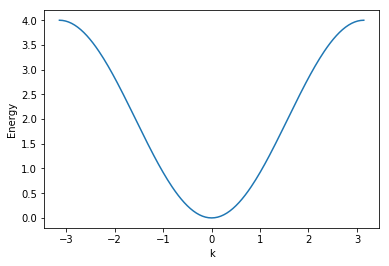

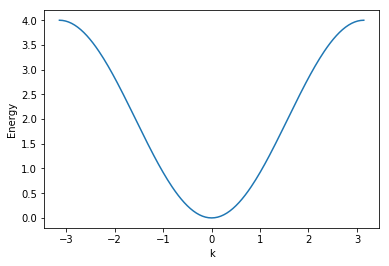

In [21]:
def plot_conductance(syst, energies): # Compute conductance
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(0, 1))
    pyplot.figure()
    pyplot.plot(energies, data)
    pyplot.xlabel("energy [t]")
    pyplot.ylabel("conductance [$e^2/h$]")
    pyplot.show()
    
syst = make_system()
# Check that the system looks as intended.
kwant.plot(syst)
# Finalize the system.
syst = syst.finalized()

kwant.plotter.bands(syst.leads[0], momenta=np.linspace(-np.pi, np.pi, 201))
# We should see conductance steps.
# plot_conductance(syst, energies=np.linspace(-10,10,128))